**Authors:** Vincent Michielini, Etienne Moutot, Ievgeniia Oshurko

# Introduction

This project is made around the dataset: Record of every death in the US for the year 2014, by the  Centers for Disease Control and Prevention (CDC). (https://www.kaggle.com/cdc/mortality).

We first investigate the data to understand correlations between the fields, then we try to implement statistical learning models to be able to give predictions about manner and causes of death. Finally, we try to apply some unsupervied clustering techniques to see what interesting patterns could be found.

# Data Preprocessing and Analysis
Here we perform data preprocessing from the raw dataset. We try to apply techniques of descritive statistics to understand the underlying structure of data.

## Data preprocessing

### Fields in dataset:

- Id
- ResidentStatus
- Education1989Revision
- Education2003Revision
- EducationReportingFlag
- MonthOfDeath
- Sex
- AgeType
- Age
- AgeSubstitutionFlag
- AgeRecode52
- AgeRecode27
- AgeRecode12
- InfantAgeRecode22
- PlaceOfDeathAndDecedentsStatus
- MaritalStatus
- DayOfWeekOfDeath
- CurrentDataYear
- InjuryAtWork
- MannerOfDeath
- MethodOfDisposition
- Autopsy
- ActivityCode
- PlaceOfInjury
- Icd10Code
- CauseRecode358
- CauseRecode113
- InfantCauseRecode130
- CauseRecode39
- NumberOfEntityAxisConditions
- NumberOfRecordAxisConditions
- Race
- BridgedRaceFlag
- RaceImputationFlag
- RaceRecode3
- RaceRecode5
- HispanicOrigin
- HispanicOriginRaceRecode

We first import the dataset.

In [ ]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

pd_data = pd.read_csv('data/DeathRecords.csv', index_col=0)

### Education
Categories we extract from the data about education

- 0: Unkown
- 1: 8th grade or less
- 2: 12th grade, no diploma
- 3: high school graduate or GED completed
- 4: some college credit, but no degree, Associate degree
- 5: Bachelor's degree
- 6: Master's degree or higher


In [6]:
from pickle import load
education_categories = load(open("education_categories.pickle", "rb"))

#### Distribution of the education categories

We see that the most frequent category is the number 3. It corresponds to the high school graduated or GED completed.

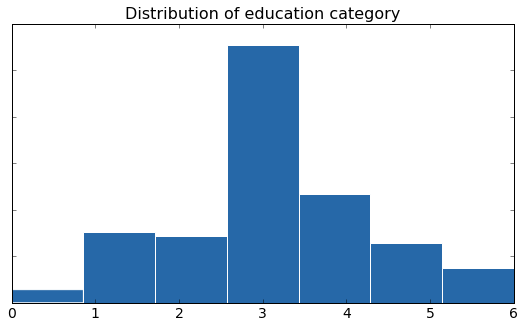

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

ax.hist(education_categories.as_matrix(), bins = 7, color="#2668A8", edgecolor="white")
ax.set_title("Distribution of education category")

ax.set_xticks(np.arange(7))

ax.title.set_fontsize(16)
ax.set_yticklabels([])

for label in (ax.get_xticklabels()):
    label.set_fontsize(14)

plt.show()

### Sex

* 0: Male
* 1: Female

In [11]:
sex_categories = load(open("sex_categories.pickle", "rb"))

#### Distribution of the sexes

The distribution is uniform in this dataset.

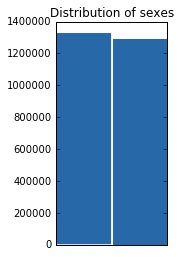

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(2, 4)

plt.hist(sex_categories.as_matrix(), bins = 2, color="#2668A8", edgecolor="white")
ax.set_xticks([])
plt.title("Distribution of sexes")

plt.show()

### Age
Age is divinded into 27 categories:

* 01 : Under 1 month (includes not stated weeks, days, hours, and minutes)
* 02 : 1 month - 11 months (includes not stated months)
* 03 : 1 year
* 04 : 2 years
* 05 : 3 years
* 06 : 4 years
* 07 : 5 -  9 years
* 08 : 10 - 14 years
* 09 :  15 - 19 years
* 10 : 20 - 24 years
* 11 : 25 - 29 years
* 12 : 30 - 34 years
* 13 : 35 - 39 years
* 14 : 40 - 44 years
* 15 : 45 - 49 years
* 16 : 50 - 54 years
* 17 : 55 - 59 years
* 18 : 60 - 64 years
* 19 : 65 - 69 years
* 20 : 70 - 74 years 
* 21 : 75 - 79 years
* 22 : 80 - 84 years
* 23 : 85 - 89 years
* 24 : 90 - 94 years
* 25 : 95 - 99 years
* 26 : 100 years and over
* 27 : Age not stated

#### Distribution of the ages

We can see that the more frequent death records are for older age. We also see that the most frequent death record for children is under 1 year-old.

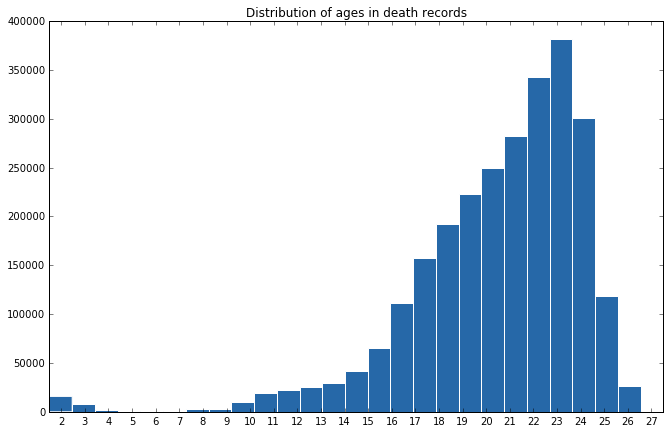

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

ax.hist(pd_data["AgeRecode27"].as_matrix(), bins = 27, color="#2668A8", edgecolor="white")

ax.set_title("Distribution of ages in death records")

ax.set_xticks(np.arange(27) + 0.5)
ax.set_xticklabels(np.arange(1,28))
ax.set_xlim([1, 27])

plt.show()

### Race
Race encoded into 3 bins

* 1 : White
* 2 : Races other than White or Black
* 3 : Black

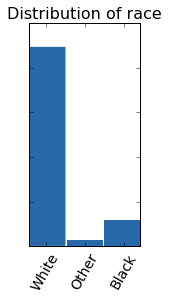

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(2, 4)

ax.hist(pd_data["RaceRecode3"].as_matrix(), bins = 3, color="#2668A8", edgecolor="white")
ax.set_title("Distribution of race")

ax.set_xticks(np.arange(1,4) + [0.3, 0, -0.3])
ax.set_xticklabels(["White", "Other", "Black"], rotation=60)

ax.title.set_fontsize(16)
ax.set_yticklabels([])

for label in (ax.get_xticklabels()):
    label.set_fontsize(14)

plt.show()

### Cause of death
Cause of death is divided into 39 categories.
See http://www.cdc.gov/nchs/data/dvs/Record_Layout_2014.pdf p19 for more details.
#### Distribution of the causes of death
The most frequent causes of death are:

* Ischemic heart diseases
* Malignant neoplasms of trachea, bronchus and lung and other malignant neoplasms
* Chronic lower respiratory diseases

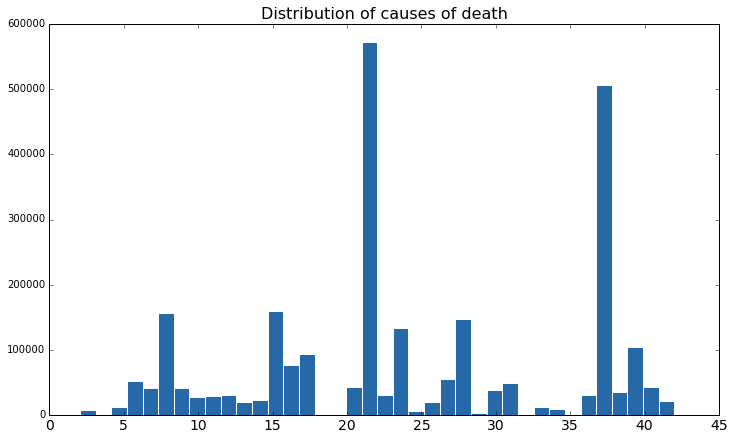

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)

ax.hist(pd_data["CauseRecode39"].as_matrix(), bins = 39, color="#2668A8", edgecolor="white")
ax.set_title("Distribution of causes of death")

ax.title.set_fontsize(16)

for label in (ax.get_xticklabels()):
    label.set_fontsize(14)

plt.show()

### Marital status
The marital status is divided into 5 categories:

* 0 : Never married, single
* 1 : Married
* 2 : Widowed
* 3 : Divorced
* 4 : Marital Status unknown

In [30]:
status_categories = load(open("status_categories.pickle", "rb"))

#### Distribution of the maritial status

The most frequent categories correspond to the married and widowed people.

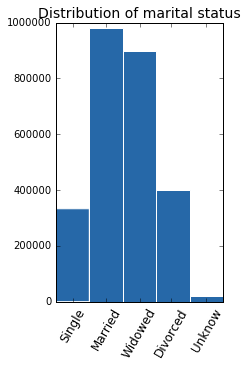

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(3, 5)

ax.hist(status_categories.as_matrix(), bins = 5, color="#2668A8", edgecolor="white")
ax.set_title("Distribution of marital status")


ax.set_xticks(np.arange(5) + [0.4, 0.2, 0, -0.25, -0.4])
ax.set_xticklabels(["Single",
                    "Married",
                    "Widowed",
                    "Divorced",
                    "Unknow"], rotation=60)
ax.title.set_fontsize(14)

for label in (ax.get_xticklabels()):
    label.set_fontsize(12)
    
plt.show()

## Data analysis
Here we look at:

* Correlations between months and causes of death
* Correlations between ages and causes of death

In [33]:
month_cause = pd.pivot_table(pd_data, values='ResidentStatus', index=['MonthOfDeath'],
                  columns=['CauseRecode39'], aggfunc=np.sum)
month_cause.to_csv("month_cause.csv")

normalized_month_cause = month_cause.copy()
for column in month_cause.columns:
    normalized_month_cause[column] = month_cause[column] / sum(month_cause[column])
normalized_month_cause.to_csv("normalized_month_cause.csv")

### Correlations between months and causes of death

At first sight, the causes of death seem uniform over the months.

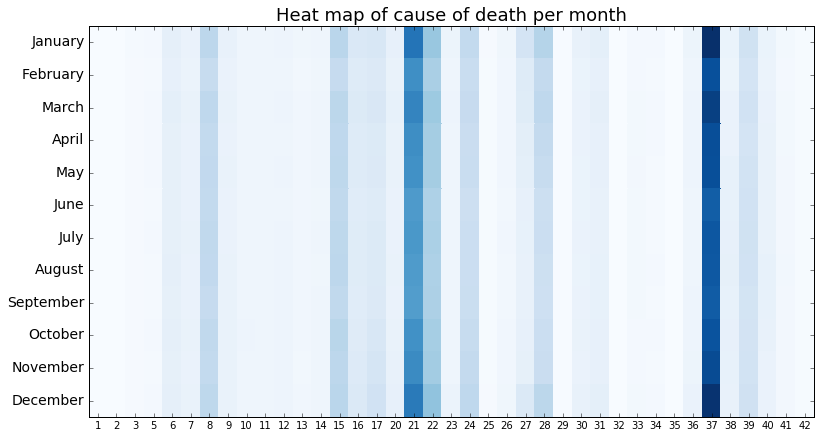

In [38]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(month_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(13, 7)
plt.gca().invert_yaxis()

ax.set_xlim([0,39])
ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(month_cause.columns)
ax.set_yticks(np.arange(12) + 0.5)
ax.set_yticklabels(["January",
                    "February",
                    "March",
                    "April",
                    "May",
                    "June",
                    "July",
                    "August",
                    "September",
                    "October",
                    "November",
                    "December"])

for label in (ax.get_yticklabels()):
    label.set_fontsize(14)


plt.title("Heat map of cause of death per month")
    
ax.title.set_fontsize(18)

plt.show()

Some correlations appear when he normalize the heat map:

* Strange frequency values for Syphilis, a lot of deaths in March.
* Strange frequency for deaths in pregnancy: a lot of deaths in January and July, but almost nothing in August.
* Deaths from influenza and pneumonia in cold months.
* Frequent deathes from Atherosclerosis and Alzheimer’s disease in December.
* More suicides in August and September.

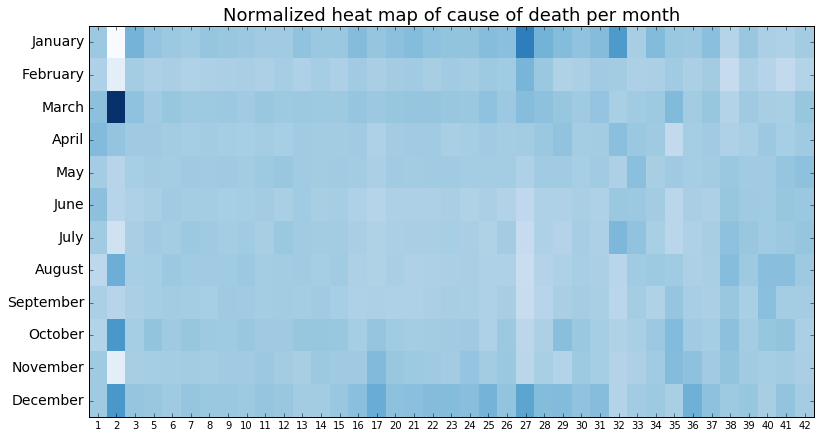

In [39]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(normalized_month_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(13, 7)
plt.gca().invert_yaxis()

ax.set_xlim([0,39])
ax.set_xticks(np.arange(39)+0.5)
ax.set_xticklabels(normalized_month_cause.columns)
ax.set_yticks(np.arange(12)+0.5)
ax.set_yticklabels(["January",
                    "February",
                    "March",
                    "April",
                    "May",
                    "June",
                    "July",
                    "August",
                    "September",
                    "October",
                    "November",
                    "December"])

for label in (ax.get_yticklabels()):
    label.set_fontsize(14)

plt.title("Normalized heat map of cause of death per month")
    
ax.title.set_fontsize(18)

pp = PdfPages('beamer/img/normalized_month_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()

In [40]:
age_cause = pd.pivot_table(pd_data, values='ResidentStatus', index=['AgeRecode27'],
                  columns=['CauseRecode39'], aggfunc=np.sum)
age_cause[np.isnan(age_cause)] = 0
age_cause.to_csv("age_cause.csv")
normalized_age_cause = age_cause.copy()
for column in age_cause.columns:
    normalized_age_cause[column] = age_cause[column] / sum(age_cause[column])
normalized_age_cause.to_csv("normalized_age_cause.csv")

### Correlations between age and cause of death

For almost all of the causes, the frequencies seem to increase for older age.

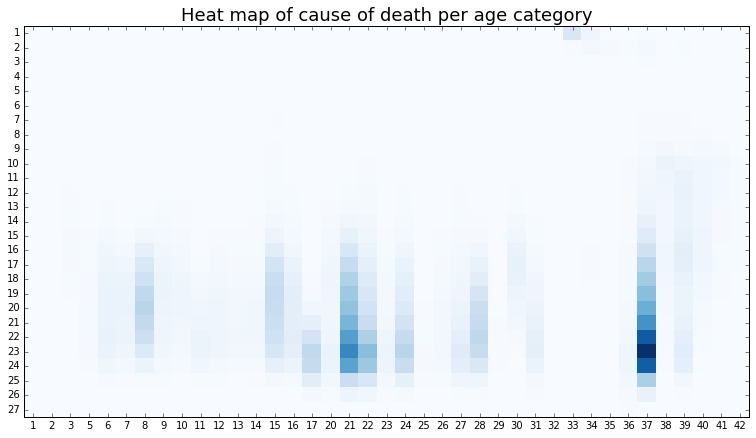

In [42]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(age_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(13, 7)

ax.set_ylim([0,27])
ax.set_xlim([0,39])
ax.invert_yaxis()

ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(age_cause.columns)
ax.set_yticks(np.arange(27) + 0.5)
ax.set_yticklabels(np.arange(len(age_cause.columns)) + 1)

plt.title("Heat map of cause of death per age category")
    
ax.title.set_fontsize(18)

plt.show()

When we normalize the heat map, some correlations appear:

* Deaths from HIV are more frequent for 35 - 59 years.
* Deaths from Alzheimer’s disease are more frequent for 85 - 94 years.
* Deaths during pregnancy are more frequent around 30 - 34 years.
* Motor vehicle accidents are very frequent for 15 - 19 years.

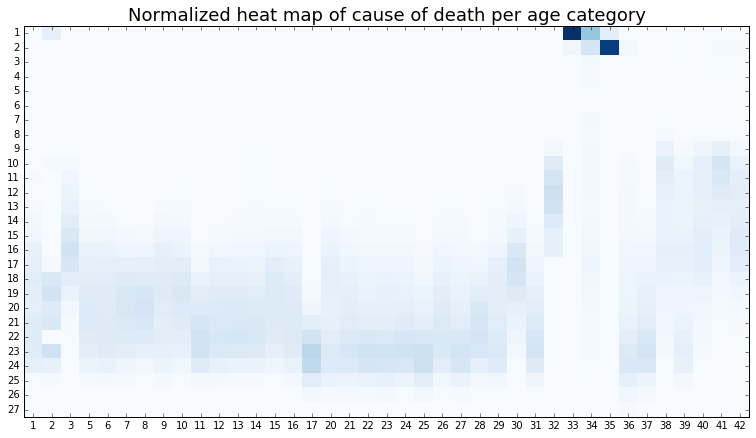

In [43]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(normalized_age_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(13, 7)

ax.set_ylim([0,27])
ax.set_xlim([0,39])
ax.invert_yaxis()

ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(age_cause.columns)
ax.set_yticks(np.arange(27) + 0.5)
ax.set_yticklabels(np.arange(len(age_cause.columns)) + 1)


plt.title("Normalized heat map of cause of death per age category")
    
ax.title.set_fontsize(18)

plt.show()

In [44]:
temp_data = pd_data[(pd_data.ActivityCode != 99) & (pd_data.ActivityCode != 9)]
activity_day_of_week = pd.pivot_table(temp_data, values='ResidentStatus', index=['DayOfWeekOfDeath'],
                  columns=['ActivityCode'], aggfunc=np.sum)
activity_day_of_week[np.isnan(activity_day_of_week)] = 0
activity_day_of_week.to_csv("activity_day_of_week.csv")

normalized_activity_day_of_week = activity_day_of_week.copy()
for column in activity_day_of_week.columns:
    normalized_activity_day_of_week[column] = activity_day_of_week[column] / sum(activity_day_of_week[column])
normalized_activity_day_of_week.to_csv("normalized_activity_day_of_week.csv")

### Correlation between the activity and the day of the week
A few correlations appear at first sight:

* People mostly die during frequent activities: leasure and vital activities (eating, sleeping etc).
* Low frequency of death while engaged with sport activities.

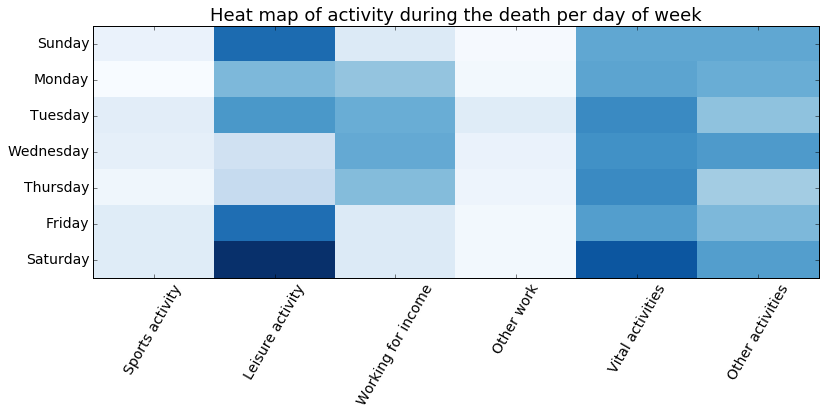

In [47]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(activity_day_of_week, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(13, 7)

ax.set_ylim([0,7])
ax.set_xlim([0,6])
ax.invert_yaxis()

ax.set_xticks(np.arange(6) + 0.5)
ax.set_xticklabels(["Sports activity",
                    "Leisure activity",
                    "Working for income",
                    "Other work",
                    "Vital activities",
                    "Other activities"], rotation=60)
ax.set_yticks(np.arange(7) + 0.5)
ax.set_yticklabels(["Sunday",
                    "Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday",
                    "Saturday",
                    "Unknown"])


for label in (ax.get_yticklabels() + ax.get_xticklabels()):
    label.set_fontsize(14)

plt.title("Heat map of activity during the death per day of week")
ax.title.set_fontsize(18)
fig.subplots_adjust(bottom=0.4)

plt.show()

When we normalize the heat map, other correlations appear:

* Death registered while engaged in leasure activity are more freqent during week-ends (specially Saturday).
* Death during the sport activities are more frequent on Friday and Saturday.
* Death registered while engaged with other work are strangely more frequent on Tuesday.

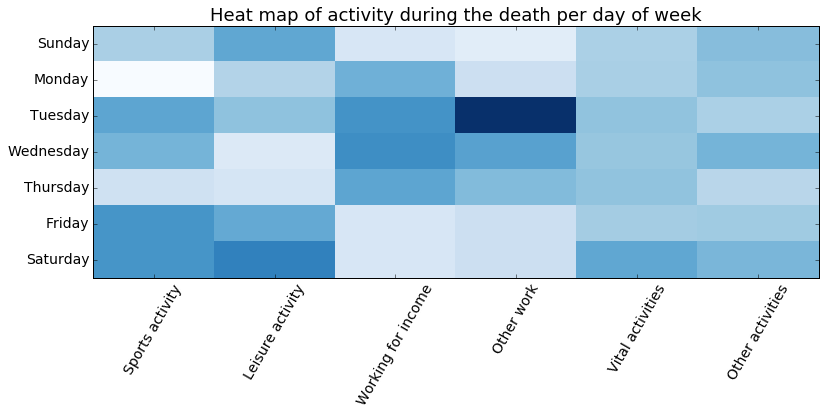

In [48]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(normalized_activity_day_of_week, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(13, 7)

ax.set_ylim([0,7])
ax.set_xlim([0,6])
ax.invert_yaxis()

ax.set_xticks(np.arange(6) + 0.5)
ax.set_xticklabels(["Sports activity",
                    "Leisure activity",
                    "Working for income",
                    "Other work",
                    "Vital activities",
                    "Other activities"], rotation=60)
ax.set_yticks(np.arange(7) + 0.5)
ax.set_yticklabels(["Sunday",
                    "Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday",
                    "Saturday",
                    "Unknown"])

fig.subplots_adjust(bottom=0.4)
for label in (ax.get_yticklabels() + ax.get_xticklabels()):
    label.set_fontsize(14)

plt.title("Heat map of activity during the death per day of week")
ax.title.set_fontsize(18)

plt.show()

# Learning
In this part, we try to learn the way people die, based on 4 features generated before:

- Education (8 bins)
- Sex
- Race (White, Black, Other)
- Martial status (Single, Married, ...)

We will try to use some learning models to "guess" how people die based one these 4 informations.  
Two informaions will be tried to be learned: 

The **manner** of death. 7 categories:

  * Accident
  * Suicide
  * Homicide
  * Pending investigation
  * Could not determine
  * Self-Inflicted
  * Natural

The **cause** of death (much more precise: 39 categories)

## Learning the Manner of death (7 bins)

First, we load the features generated by previous part.

In [49]:
import numpy as np
from pickle import load
from time import time

features = load(open("features4.pickle", "rb"))
y_all = load(open("manner.pickle", "rb"))

After that, we generate the train and test sets, the train set being a random subset of 10000 people from the entire dataset.

In [59]:
from sklearn.cross_validation import train_test_split

selected = np.random.randint(y_all.shape[0],size=10000)
X = features[selected,:]
y = y_all[selected]

X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

On these sets, we perform a transformation to perform distances between **categorical** features.

In [60]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(X)
X_test = enc.transform(X_test)

### Model comparison

#### SVC

In [61]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import cross_validation

C = 10
clf = OneVsRestClassifier(
    SVC(kernel='linear', C=C, probability=True), n_jobs=4)

print("TRAINING....")

t0 = time()
clf.fit(X, y)
t1 = time()
print("TIME:\n", t1-t0)

print("SCORE:")
print(clf.score(X_test, y_test))

TRAINING....
TIME:
 5.924397706985474
SCORE:
0.77696969697


#### K neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=300)
print("TRAINING....")

t0 = time()
clf.fit(X, y)
t1 = time()
print("TIME:\n", t1-t0)

print("SCORE:")
print(clf.score(X_test, y_test))

TRAINING....
TIME:
 0.001226186752319336
SCORE:
0.788484848485


#### Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
print("TRAINING....")

t0 = time()
clf.fit(X.toarray(), y)
t1 = time()
print("TIME:\n", t1-t0)


print("SCORE:")
print(clf.score(X_test.toarray(), y_test))

TRAINING....
TIME:
 0.008626937866210938
SCORE:
0.786363636364


Here the three models give greate results (very high score), but we can see that the linear SVC is much slower than the other two.  
For the examples below, the Naive Bayes model is used.

### Examples

Black man with no education

In [62]:
ex = enc.transform([[1, 0, 3, 0]])
clf.predict_proba(ex)

array([[  1.35313632e-01,   5.62983702e-02,   1.93799596e-02,
          8.70551853e-03,   5.06012241e-04,   4.49193986e-03,
          7.75304568e-01]])

White woman married, with high education

In [63]:
ex = enc.transform([[6, 1, 1, 1]])
clf.predict_proba(ex)

array([[  1.40726017e-01,   5.41724284e-02,   1.93013870e-02,
          8.67016922e-03,   5.03930033e-04,   4.47371774e-03,
          7.72152350e-01]])

## Learning the cause of death (39 bins)

In [64]:
features = load(open("features4.pickle", "rb"))
y_all = load(open("cause.pickle", "rb"))

from sklearn.cross_validation import train_test_split

selected = np.random.randint(y_all.shape[0],size=10000)
X = features[selected,:]
y = y_all[selected]

X, X_test, y, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(X)
X_test = enc.transform(X_test)

### K Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=300)
print("TRAINING....")

t0 = time()
clf.fit(X, y)
t1 = time()
print("TIME:\n", t1-t0)

print("SCORE:")
print(clf.score(X_test, y_test))

TRAINING....
TIME:
 0.001646280288696289
SCORE:
0.188484848485


As you can see, for learning these 39 bins, we don't have much information. The error is to small to expect reliable results from the model. We are here at the limit of this dataset. 

To be able to learn this precise cause of deatch, we must have access to more information about these people like medical details, geographic position, ...

# Clustering

We try to apply some clustering techniques on our data to discover patterns.

## Clustering with k-means

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

We perform k-means clustering on the dataset with the following features:

- Education category
- Sex
- Race
- Marital
- Manner of death

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, SpectralClustering
from sklearn import decomposition

In [71]:
features = np.column_stack((features, y_all))
selected = np.random.randint(features.shape[0],size=10000)
X = features[selected,:]

model = KMeans(n_clusters=3)
model.fit(X)
print("Cluster centers:")
for c in model.cluster_centers_:
    print(c)

Cluster centers:
[  3.22679717   0.4957813    1.28450894   1.51805602  11.76915289
  11.76915289  11.76915289]
[  3.04411765   0.48104575   1.27352941   1.44803922  37.08333333
  37.08333333  37.08333333]
[  3.10309278   0.48881066   1.24440533   1.62283128  23.37465426
  23.37465426  23.37465426]


When we try to interpret the centroid values of the clusters we can see that three clusters were extracted:

- People with high education category that died from Natural death
- People with average education category that died from Accident/Suicide
- People with average education category that died from Natural death

In general, clustering with more clusters does not give us interpretable results, and usually separates the data by the education category and different manners of death

## PCA for clustering visualization in 2D

To visualize the results of clustering in 2D we use Principle Component Analysis and take first two principal components

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

NameError: name 'decomposition' is not defined

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

colors = np.choose(model.labels_, ["r","g", "b"])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, cmap=plt.cm.spectral, lw=0, s=60)
plt.title("Data projected on two principal components with cluster colors")

plt.show()

# Biclustering

http://scikit-learn.org/stable/modules/biclustering.html

We tried to apply biclustering  to find some patterns in the following dataset:
- Age Cateogry / Cause of death frequency table


In [ ]:
normalized_age_cause = pd.read_csv("normalized_age_cause.csv")
age_cause = pd.read_csv("age_cause.csv")

In [ ]:
from sklearn.cluster.bicluster import SpectralBiclustering

model = SpectralBiclustering(n_clusters=3)
model.fit(normalized_age_cause)

row_indices = np.argsort(model.row_labels_)
fit_data = normalized_age_cause.iloc(row_indices)
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("Age/cause data:after biclustering")

plt.show()

In [ ]:
model = SpectralBiclustering(n_clusters=3)
model.fit(age_cause)

row_indices = np.argsort(model.row_labels_)
fit_data = age_cause.iloc(row_indices)
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("Normalized age/cause: after biclustering")

plt.show()

Biclustering seems not to give any meaningful results, because it was very hard to interpret the clusters. For example, the biclustering assigns Alzheimer’s disease and syndrome of instant infant death were assigned to the same cluster.

# Conclusion

The dataset is very rich, but the majority of the fields include information about the death itself, and not about the person. This is the reason why predictive model performes well on the manner of death prediction (only 7 categories), but does not give precise answers on the cause of death (more precise with 39 categories). This could be improved by intersecting our data with an external knowledge database about these dead people.

A lot of interesting correlations can be found in the dataset, which gives opportunity to discover some interesting patterns, if we continue the investigation with usupervised machine learning techniques.